In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [17]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol
ticker_symbol = 'NVDA'

# Download historical stock data for Apple
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2024-01-01')

# Save the data to a CSV file
stock_data.to_csv('nvidia_stock_data.csv')

# Display the first few rows of the dataset
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close     Volume
Date                                                            
2023-01-03  14.851  14.996  14.096  14.315  14.306806  401277000
2023-01-04  14.567  14.853  14.241  14.749  14.740556  431324000
2023-01-05  14.491  14.564  14.148  14.265  14.256834  389168000
2023-01-06  14.474  15.010  14.034  14.859  14.850494  405044000
2023-01-09  15.284  16.056  15.141  15.628  15.619055  504231000


Mean Absolute Error (MAE): 0.6902
Mean Squared Error (MSE): 0.7201
Root Mean Squared Error (RMSE): 0.8486
R-squared Score: 0.9941
Cross-Validated RMSE: 0.9986 ± 0.1859


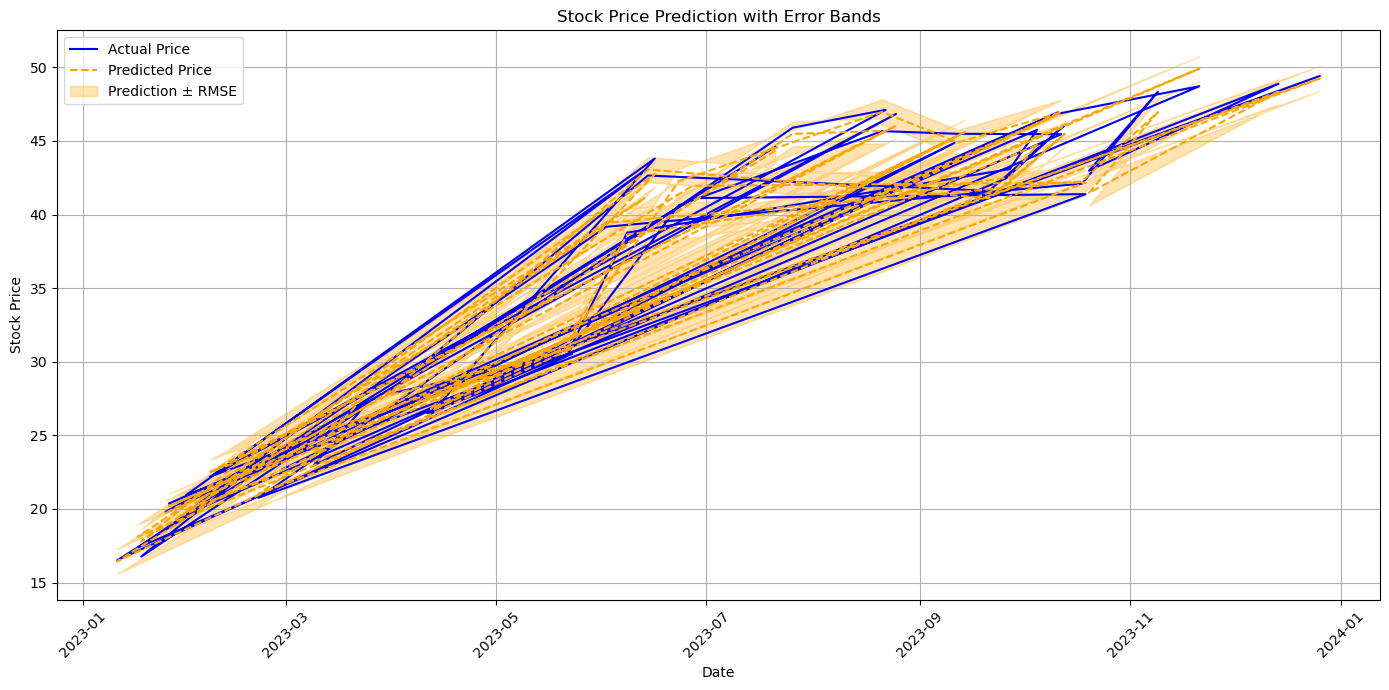

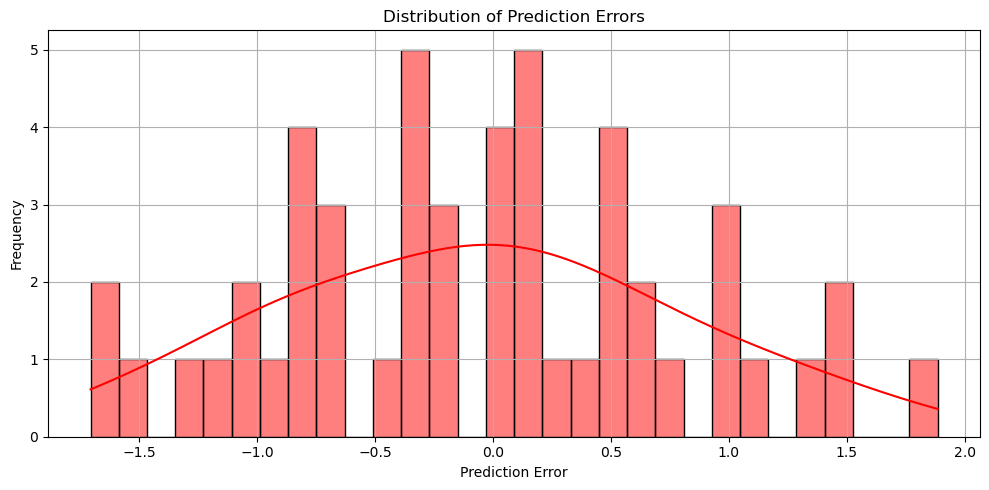

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Cross-validation with K-Folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_mse)
print(f"Cross-Validated RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

# Plotting predictions vs actual prices with error shading
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', linestyle='--', color='orange')

# Error bars to visualize deviation
plt.fill_between(y_test.index, y_pred - rmse, y_pred + rmse, color='orange', alpha=0.3, label='Prediction ± RMSE')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with Error Bands')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Additional plot: Error distribution
plt.figure(figsize=(10, 5))
errors = y_test - y_pred
sns.histplot(errors, bins=30, kde=True, color='red')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()